In [ ]:
import os
import google.colab.drive
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_name = "unsloth/Mistral-Small-Instruct-2409-bnb-4bit"
model_name = "unsloth/phi-4-unsloth-bnb-4bit"
model_name = "unsloth/DeepSeek-R1-Distill-Qwen-1.5B-bnb-4bit"
model_name = "unsloth/Qwen3-8B-unsloth-bnb-4bit"
#model_name = "unsloth/Meta-Llama-3.1-8B-bnb-4bit"

modele_str = model_name.split('/')[-1]
PATH_input_gender = '/content/drive/MyDrive/Projet DEBIAR/labeled_lyrics_gender_' + modele_str + '.xlsx'
PATH_output_gender_temp = '/content/drive/MyDrive/Projet DEBIAR/' + modele_str + '/'
PATH_output_gender = PATH_output_gender_temp
df = pd.ExcelFile(PATH_input_gender)
df = df.parse("Sheet1")
df.head()

#créer le dossier modele_str s'il n'existe pas déjà
if not os.path.exists(PATH_output_gender):
    os.makedirs(PATH_output_gender)

df = df.dropna(subset=['genre_LLM'])
df = df.dropna(subset=['ethnicity_LLM'])
df.to_excel(PATH_input_gender, index=False)

# Statistiques

In [ ]:
PATH_output_gender = PATH_output_gender_temp + 'stats/'
os.makedirs(PATH_output_gender, exist_ok=True)

In [ ]:
#on affiche le nom des artistes qui ont pour genre "person"
df[df['genre'] == 'Person']['track_artist'].unique()
#SAYMYNAME => female
#Aleman => male
#Fili => group
#MiMS => male

df.loc[df['track_artist'] == 'SAYMYNAME', 'genre'] = 'female'
df.loc[df['track_artist'] == 'Aleman', 'genre'] = 'male'
df.loc[df['track_artist'] == 'Fili', 'genre'] = 'group'
df.loc[df['track_artist'] == 'MiMS', 'genre'] = 'male'
df = df.dropna(subset=['genre'])
df.to_excel(PATH_input_gender, index=False)


genre
male      96
Group     68
female    29
Name: count, dtype: int64


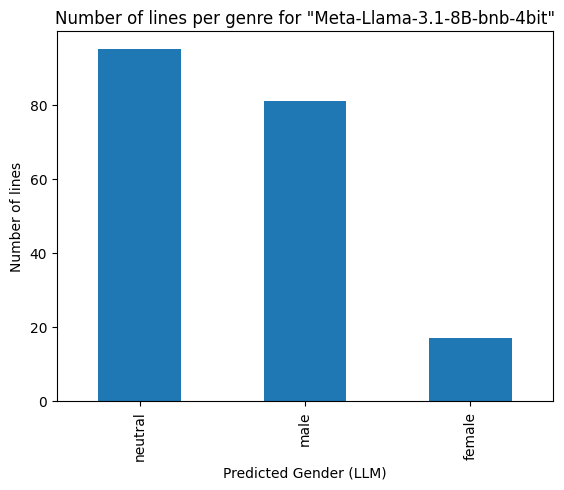

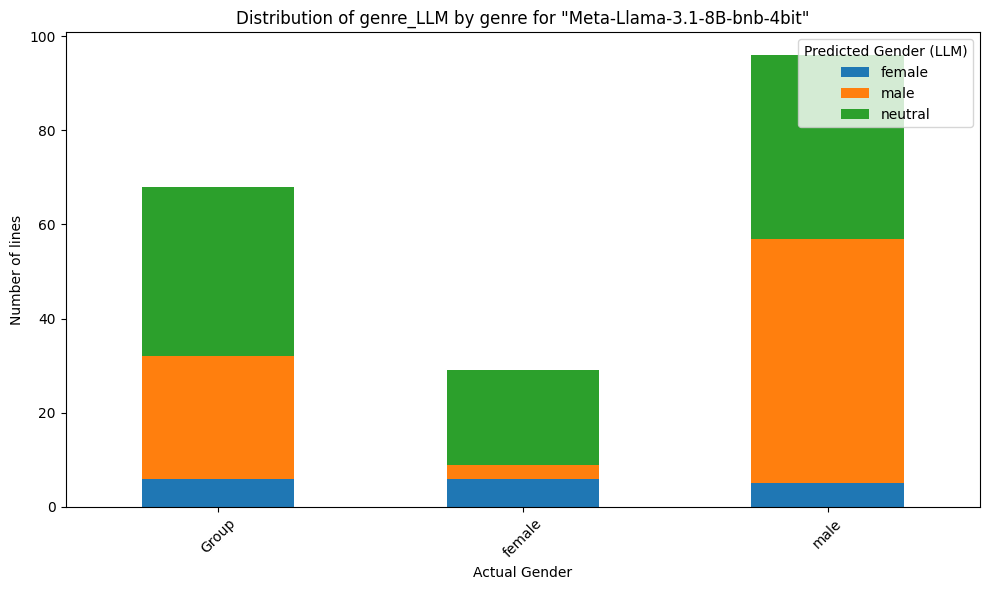

In [ ]:
import matplotlib.pyplot as plt
df = pd.ExcelFile(PATH_input_gender)
df = df.parse("Sheet1")

#on affiche les classes de genre de df qui ont un genre
#df[df['genre'] == 'Person'] = None  # Remove this line
df_genre = df[df['genre_LLM'].notna()]
print(df_genre['genre'].value_counts())
df_genre['genre_LLM'].value_counts().plot(kind='bar')
plt.title('Number of lines per genre for "' + modele_str + '"')
plt.xlabel('Predicted Gender (LLM)')
plt.ylabel('Number of lines')
plt.savefig(PATH_output_gender + 'genre_LLM_' + modele_str + '.png')
plt.show()

genre_llm_counts = df_genre.groupby('genre')['genre_LLM'].value_counts().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))

genre_llm_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribution of genre_LLM by genre for "' + modele_str + '"')
ax.set_xlabel('Actual Gender')
ax.set_ylabel('Number of lines')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Predicted Gender (LLM)', loc='upper right')

plt.tight_layout()
plt.savefig(PATH_output_gender + 'stacked_bar_chart_gender_' + modele_str + '.png')
plt.show()

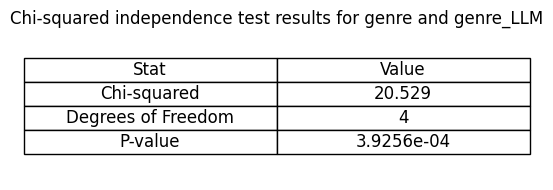

In [ ]:
from scipy.stats import chi2_contingency

df_cleaned_contingency = df.dropna(subset=['genre', 'genre_LLM']).copy()
contingency_table = pd.crosstab(df_cleaned_contingency['genre'], df_cleaned_contingency['genre_LLM'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
table_data = [
    ["Chi-squared", f"{chi2:.3f}"],
    ["Degrees of Freedom", dof],
    ["P-value", f"{p:.4e}"]
]
table = ax.table(cellText=table_data,
                 colLabels=["Stat", "Value"],
                 cellLoc="center",
                 loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("Chi-squared independence test results for genre and genre_LLM")
plt.tight_layout()
plt.savefig(PATH_output_gender + 'chi-squared_independence_test_' + modele_str + '.png')
plt.show()


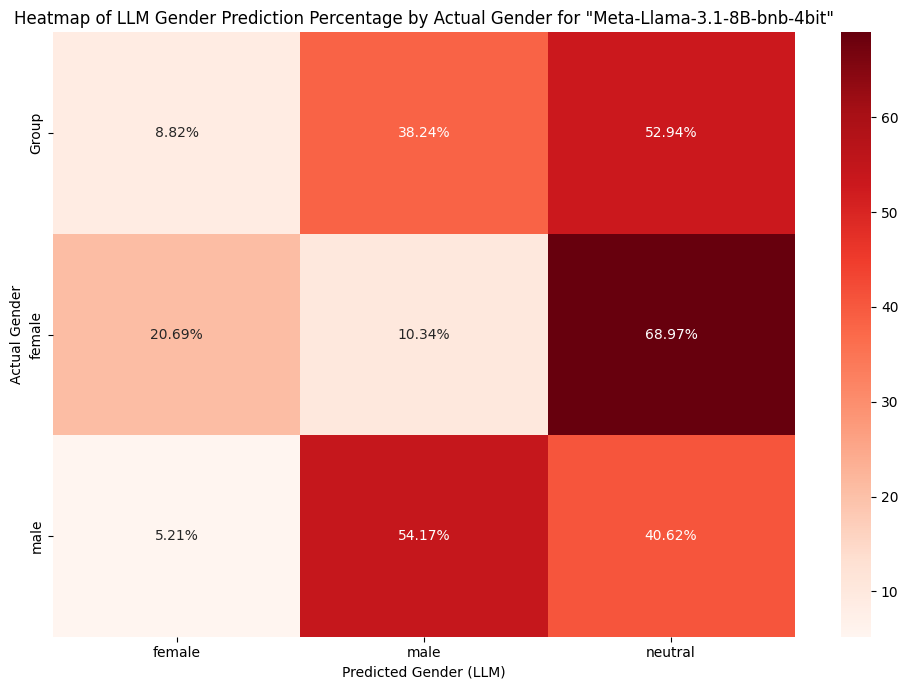

In [ ]:
import seaborn as sns
contingency_table_percentage = contingency_table.apply(lambda x: x / x.sum(), axis=1) * 100
annot = contingency_table_percentage.applymap(lambda x: f"{x:.2f}%")

plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table_percentage, annot=annot, fmt="", cmap="Reds")

plt.title('Heatmap of LLM Gender Prediction Percentage by Actual Gender for "' + modele_str + '"')
plt.xlabel('Predicted Gender (LLM)')
plt.ylabel('Actual Gender')
plt.tight_layout()
plt.savefig(PATH_output_gender + 'heatmap_percentage_gender_' + modele_str + '.png')
plt.show()

ethnie
north-american    116
european           60
latino              9
oceania             4
asian               3
arabic              1
Name: count, dtype: int64


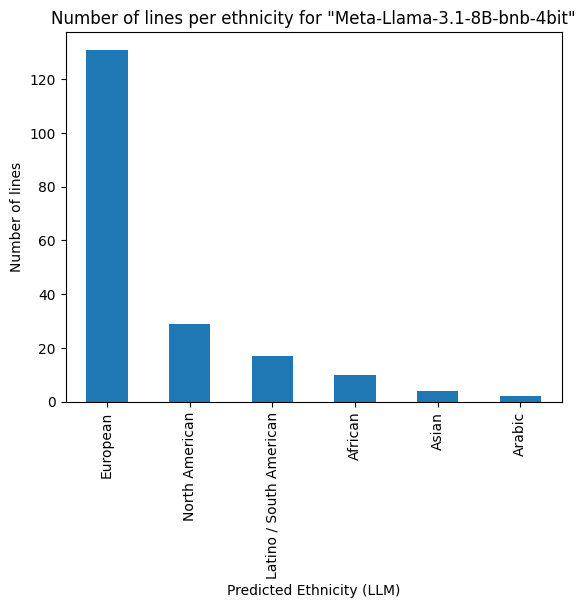

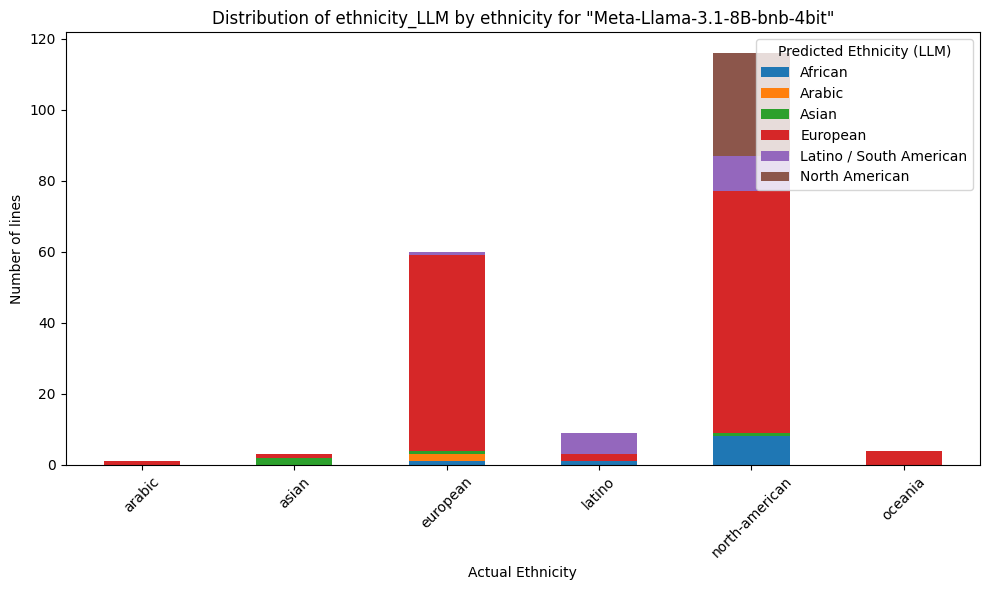

In [ ]:
import matplotlib.pyplot as plt
df = pd.ExcelFile(PATH_input_gender)
df = df.parse("Sheet1")

#on affiche les classes d'ethnie de df qui ont une ethnie
df_ethnicity = df[df['ethnicity_LLM'].notna()]
print(df_ethnicity['ethnie'].value_counts())
df_ethnicity['ethnicity_LLM'].value_counts().plot(kind='bar')
plt.title('Number of lines per ethnicity for "' + modele_str + '"')
plt.xlabel('Predicted Ethnicity (LLM)')
plt.ylabel('Number of lines')
plt.savefig(PATH_output_gender + 'ethnicity_LLM_' + modele_str + '.png')
plt.show()

ethnie_llm_counts = df_ethnicity.groupby('ethnie')['ethnicity_LLM'].value_counts().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))

ethnie_llm_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribution of ethnicity_LLM by ethnicity for "' + modele_str + '"')
ax.set_xlabel('Actual Ethnicity')
ax.set_ylabel('Number of lines')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Predicted Ethnicity (LLM)', loc='upper right')

plt.tight_layout()
plt.savefig(PATH_output_gender + 'stacked_bar_chart_ethnicity_' + modele_str + '.png')
plt.show()

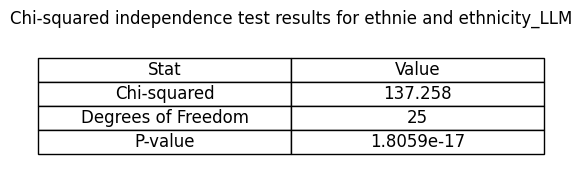

In [ ]:
from scipy.stats import chi2_contingency

df_cleaned_contingency_ethnicity = df.dropna(subset=['ethnie', 'ethnicity_LLM']).copy()
contingency_table_ethnicity = pd.crosstab(df_cleaned_contingency_ethnicity['ethnie'], df_cleaned_contingency_ethnicity['ethnicity_LLM'])
chi2_ethnicity, p_ethnicity, dof_ethnicity, expected_ethnicity = chi2_contingency(contingency_table_ethnicity)

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
table_data_ethnicity = [
    ["Chi-squared", f"{chi2_ethnicity:.3f}"],
    ["Degrees of Freedom", dof_ethnicity],
    ["P-value", f"{p_ethnicity:.4e}"]
]
table_ethnicity = ax.table(cellText=table_data_ethnicity,
                 colLabels=["Stat", "Value"],
                 cellLoc="center",
                 loc="center")
table_ethnicity.auto_set_font_size(False)
table_ethnicity.set_fontsize(12)
table_ethnicity.scale(1.5, 1.5)

plt.title("Chi-squared independence test results for ethnie and ethnicity_LLM")
plt.tight_layout()
plt.savefig(PATH_output_gender + 'chi-squared_independence_test_ethnicity_' + modele_str + '.png')
plt.show()

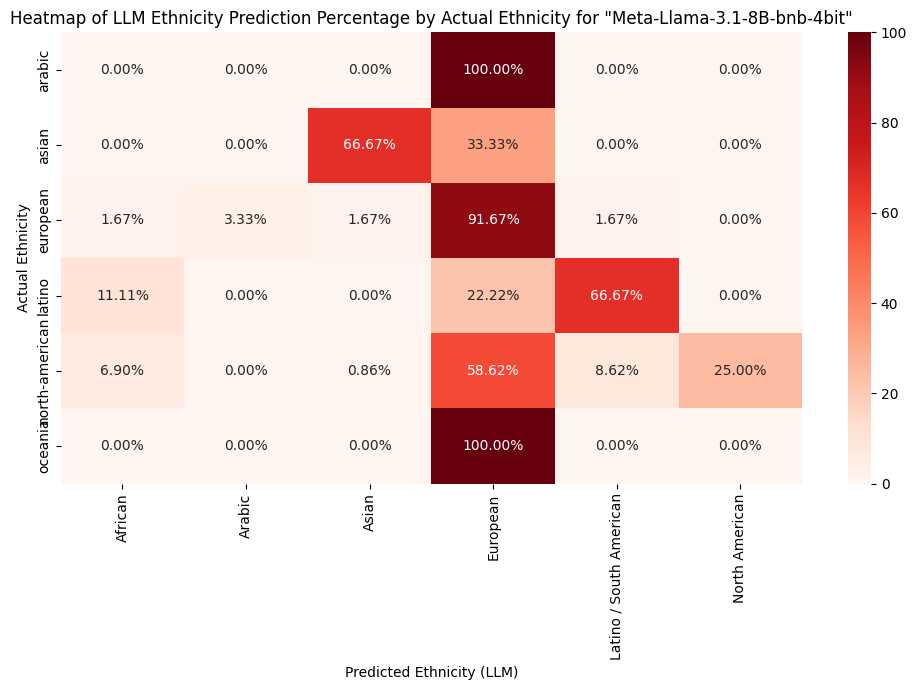

In [ ]:
contingency_table_percentage_ethnicity = contingency_table_ethnicity.apply(lambda x: x / x.sum(), axis=1) * 100
annot_ethnicity = contingency_table_percentage_ethnicity.applymap(lambda x: f"{x:.2f}%")

plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table_percentage_ethnicity, annot=annot_ethnicity, fmt="", cmap="Reds")

plt.title('Heatmap of LLM Ethnicity Prediction Percentage by Actual Ethnicity for "' + modele_str + '"')
plt.xlabel('Predicted Ethnicity (LLM)')
plt.ylabel('Actual Ethnicity')
plt.tight_layout()
plt.savefig(PATH_output_gender + 'heatmap_percentage_ethnicity_' + modele_str + '.png')
plt.show()


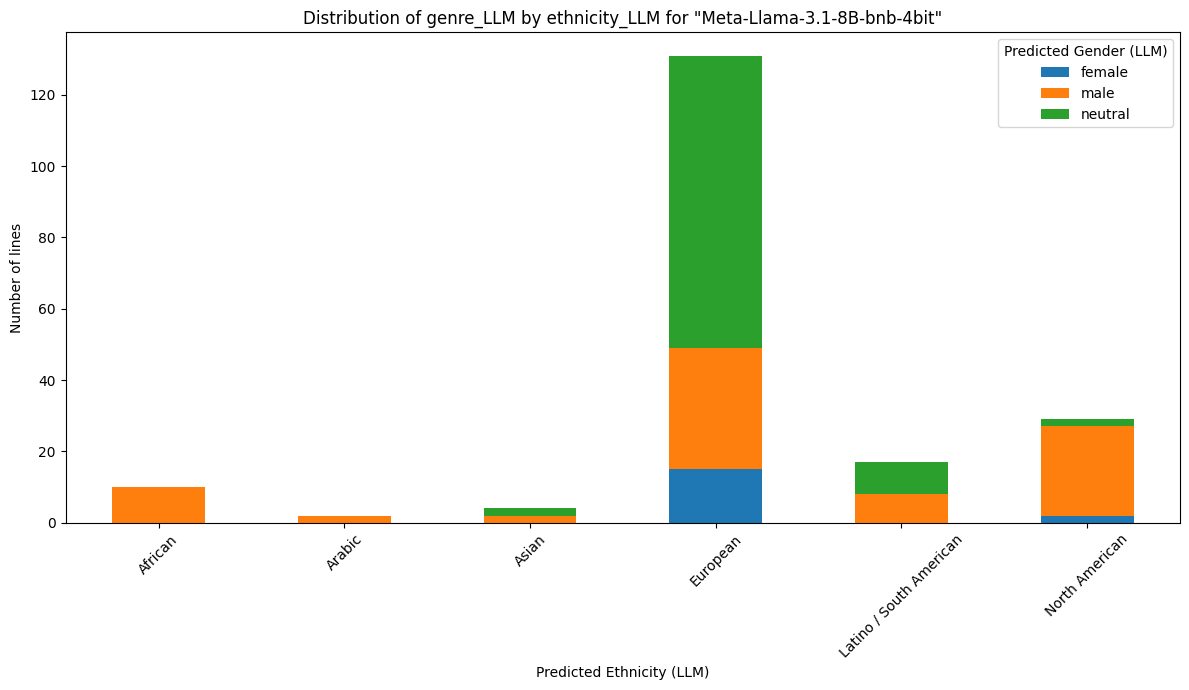

In [ ]:
import matplotlib.pyplot as plt
df = pd.ExcelFile(PATH_input_gender)
df = df.parse("Sheet1")

# Filter out rows where either ethnicity_LLM or genre_LLM is missing
df_filtered = df.dropna(subset=['ethnicity_LLM', 'genre_LLM'])

# Create the cross-tabulation of ethnicity_LLM and genre_LLM
ethnicity_genre_llm_counts = df_filtered.groupby('ethnicity_LLM')['genre_LLM'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

ethnicity_genre_llm_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Distribution of genre_LLM by ethnicity_LLM for "' + modele_str + '"')
ax.set_xlabel('Predicted Ethnicity (LLM)')
ax.set_ylabel('Number of lines')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Predicted Gender (LLM)', loc='upper right')

plt.tight_layout()
plt.savefig(PATH_output_gender + 'stacked_bar_chart_ethnicity_gender_' + modele_str + '.png')
plt.show()

# Topic Modelling

In [ ]:
PATH_output_gender = PATH_output_gender_temp + 'topic_modelling/'
os.makedirs(PATH_output_gender, exist_ok=True)

In [ ]:
!pip install bertopic
!pip install umap-learn
!pip install -U kaleido
from bertopic import BERTopic

In [ ]:
df = pd.ExcelFile(PATH_input_gender)
df = df.parse("Sheet1")
df.head()

#target_text = "'keywords_LLM_Gender'"
target_text = "keywords_LLM_Ethicity"
#target_text = "english_lyrics"

#target_labels = "genre_LLM"
target_labels = "ethnicity_LLM"

PATH_output_gender = PATH_output_gender_temp + 'topic_modelling/' + target_labels + '_and_' + target_text + '/'
os.makedirs(PATH_output_gender, exist_ok=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
def clean_text(text):
    # Met en minuscule
    text = text.lower()
    # Supprime les caractères non alphabétiques
    text = re.sub(r"[^a-z\s]", "", text)
    # Supprime les stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Applique sur ta colonne lyrics
df[target_text] = df[target_text].astype(str).apply(clean_text)

In [ ]:
topic_model = BERTopic(language="english")
documents = df[target_text].tolist()
print(len(documents))
labels = df[target_labels].unique().tolist()
labels = [label for label in labels if str(label) != 'nan']
topics, probs = topic_model.fit_transform(documents)
topics_per_class = topic_model.topics_per_class(documents, classes = df[target_labels])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_topics = df.copy()
df_topics["topic"] = topics
df_topics = df_topics.dropna(subset=[target_labels])

# calcul de la distribution des topics par genre
topic_dist = df_topics.groupby(["topic", target_labels]).size().unstack(fill_value=0)

# Ajouter colonne genre dominant et score associé
topic_dist["dominant_label"] = topic_dist.idxmax(axis=1)
# Exclude 'dominant_label' column from the sum and max calculations
topic_dist["dominant_score"] = topic_dist.drop(columns=["dominant_label"]).max(axis=1) / topic_dist.drop(columns=["dominant_label"]).sum(axis=1)

dLabelTopic = dict()
for key in labels:
  dLabelTopic[key] = topic_dist[topic_dist["dominant_label"] == key].index.tolist()

In [ ]:
#affichage de la carte des topics
fig = topic_model.visualize_documents(documents)
fig.write_html(PATH_output_gender + 'documents_and' + target_labels + '_' + modele_str + '.html')
fig.show()

fig = topic_model.visualize_topics_per_class(topics_per_class)
fig.write_html(PATH_output_gender + 'topics_per_' + target_labels + '_' + modele_str + '.html')
fig.show()

fig = topic_model.visualize_barchart()
fig.write_html(PATH_output_gender + 'barchart_' + target_labels + '_' + modele_str + '.html')
fig.show()

In [ ]:
def plot_wordcloud(topic_model, topic_id, title=None):
    words = dict(topic_model.get_topic(topic_id))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title or f"Topic {topic_id}")
    plt.savefig(PATH_output_gender + 'wordcloud_topic_' + title.replace(" ", "_") + '_' + modele_str + '.png')
    plt.show()

# Iterate through the keys of the dLabelTopic dictionary
for label in dLabelTopic.keys():
  print(f"Label: {label}")
  for topic_id in dLabelTopic[label]:
    plot_wordcloud(topic_model, topic_id, title=f"Topic {topic_id} for {label.replace('/','')}")

In [ ]:
"""df_all_lyrics = pd.ExcelFile("/content/drive/MyDrive/Projet DEBIAR/translated_lyrics.xlsx")
df_all_lyrics = df_all_lyrics.parse("Sheet1")

#df[target_text] = df[target_text].astype(str).apply(clean_text)
df_all_lyrics["english_lyrics"] = df_all_lyrics["english_lyrics"].astype(str).apply(clean_text)

documents = df_all_lyrics["english_lyrics"].tolist()
print(len(documents))
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(documents)
df_all_lyrics["topic"] = topics

topic_model.visualize_documents(documents)

labels = ["Group",'male','female']
topic_model.visualize_documents(documents)"""